# CALIBRATION

In [441]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

## Opening files

In [442]:


# Importing Data
x = []
y = []

# Open file in read mode
with open("../20251105 Na-22 01.csv", "r", newline="") as file:
    # Skip header
    next(file)

    for line in file:
        # split column
        line_splitted = line.split(",")
        x.append(float(line_splitted[0]))
        y.append(float(line_splitted[1]))

# Convert lists to numpy arrays
x_array = np.array(x)
y_array = np.array(y)



## Define ranges of masked / unmasked ranges

In [443]:


# Define the two unmasked x-ranges
x_min1, x_max1 = 1822, 2336
x_min2, x_max2 = 3600, 4100

# Create boolean masks for each unmasked range
mask_range1 = (x_array >= x_min1) & (x_array <= x_max1)
mask_range2 = (x_array >= x_min2) & (x_array <= x_max2)

# Combine both unmasked ranges
unmasked_mask = mask_range1 | mask_range2

# Masked = everything outside both ranges
masked_mask = ~unmasked_mask

# Separate data for plotting/fitting
x_selection_1 = x_array[mask_range1]
y_selection_1 = y_array[mask_range1]

x_selection_2 = x_array[mask_range2]
y_selection_2 = y_array[mask_range2]

x_masked = x_array[masked_mask]
y_masked = y_array[masked_mask]



## Fit to Gaussian funtion

In [444]:


# --- Fit Gaussian to first range ---
gauss1 = models.GaussianModel(prefix='g1_')
pars1 = gauss1.guess(y_selection_1, x=x_selection_1)
result1 = gauss1.fit(y_selection_1, pars1, x=x_selection_1)

print(x_selection_1)
print(y_selection_1)
print(max(y_selection_1))

# Fit Gaussian to second range
gauss2 = models.GaussianModel(prefix="g2_")
pars2 = gauss2.guess(y_selection_2, x=x_selection_2)
result2 = gauss2.fit(y_selection_2, pars2, x=x_selection_2)


[1823.52941176 1862.74509804 1901.96078431 1941.17647059 1980.39215686
 2019.60784314 2058.82352941 2098.03921569 2137.25490196 2176.47058824
 2215.68627451 2254.90196078 2294.11764706 2333.33333333]
[ 14.  22.  28.  53. 112. 153. 225. 204. 144.  65.  23.  10.   6.   3.]
225.0


## Creating Plot with Gaussian fits

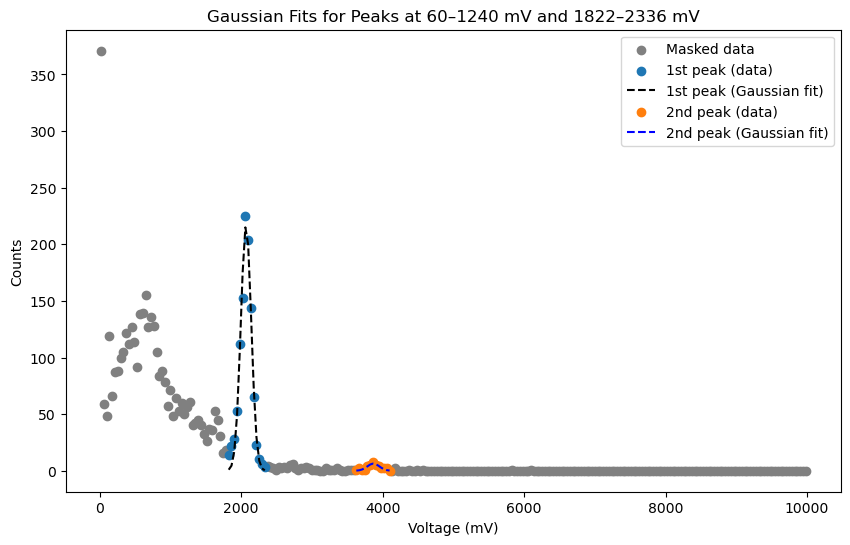

In [445]:
plt.figure(figsize=(10, 6))

# Masked data (outside both peaks)
plt.scatter(x_masked, y_masked, color="grey", label="Masked data")

# Unmasked and fitted data for each peak
plt.scatter(x_selection_1, y_selection_1, label="1st peak (data)")
plt.plot(x_selection_1, result1.best_fit, "k--", label="1st peak (Gaussian fit)")

plt.scatter(x_selection_2, y_selection_2, label="2nd peak (data)")
plt.plot(x_selection_2, result2.best_fit, "b--", label="2nd peak (Gaussian fit)")

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Gaussian Fits for Peaks at 60–1240 mV and 1822–2336 mV")
plt.legend()
plt.show()



## Fit result

In [446]:

print("\n=== Gaussian Fit 1 (60–1240 mV) ===")
print(result1.fit_report())

print("\n=== Gaussian Fit 2 (1822–2336 mV) ===")
print(result2.fit_report())



=== Gaussian Fit 1 (60–1240 mV) ===
[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 14
    # variables        = 3
    chi-square         = 1378.87312
    reduced chi-square = 125.352102
    Akaike info crit   = 70.2595035
    Bayesian info crit = 72.1766755
    R-squared          = 0.98221766
[[Variables]]
    g1_amplitude:  40106.0743 +/- 1389.18010 (3.46%) (init = 39176.47)
    g1_center:     2068.32638 +/- 2.95279606 (0.14%) (init = 2078.431)
    g1_sigma:      73.8282227 +/- 2.95289979 (4.00%) (init = 58.82353)
    g1_fwhm:       173.852175 +/- 6.95354751 (4.00%) == '2.3548200*g1_sigma'
    g1_height:     216.719419 +/- 7.50662214 (3.46%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_amplitude, g1_sigma) = +0.5774

=== Gaussian Fit 2 (1822–2336 mV) ===
[[Model]]
    Model(gaussian, prefix='g2_')
[[Fit Statistics]]
 

Lineaire fit

## Cesium fit and fit results

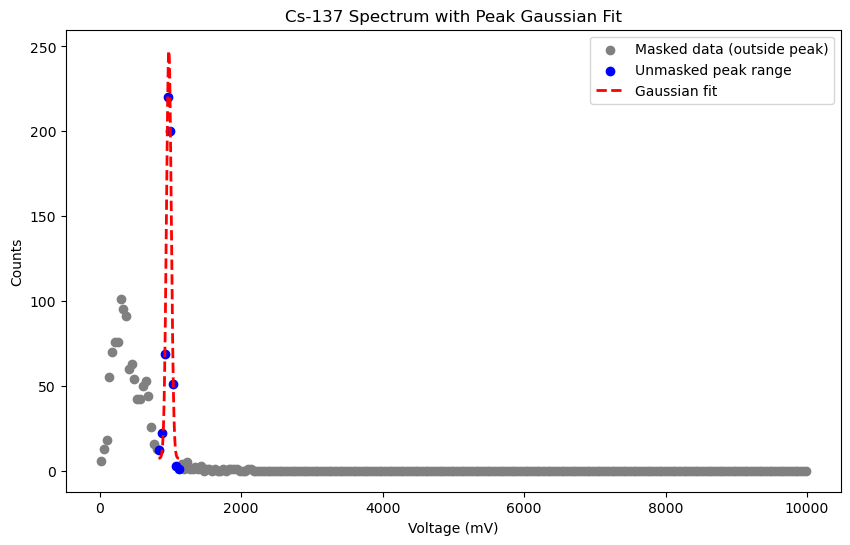

[[Model]]
    (Model(gaussian, prefix='cs_') + Model(constant, prefix='bkg_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 147
    # data points      = 8
    # variables        = 4
    chi-square         = 214.176092
    reduced chi-square = 53.5440231
    Akaike info crit   = 34.2988560
    Bayesian info crit = 34.6166221
    R-squared          = 0.99608020
[[Variables]]
    cs_amplitude:  20387.9674 +/- 966.090234 (4.74%) (init = 220)
    cs_center:     977.212628 +/- 1.17056892 (0.12%) (init = 960.7843)
    cs_sigma:      33.8590660 +/- 1.50888168 (4.46%) (init = 48.33333)
    bkg_c:         7.26348500 +/- 4.02188721 (55.37%) (init = 1)
    cs_fwhm:       79.7320057 +/- 3.55314475 (4.46%) == '2.3548200*cs_sigma'
    cs_height:     240.219934 +/- 7.84171942 (3.26%) == '0.3989423*cs_amplitude/max(1e-15, cs_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(cs_amplitude, bkg_c)    = -0.7657
    C(cs_amplitude, cs_sigma) = +0.7496
    C

In [447]:
# --- Opening File for Cs-137 ---
cs_voltage = []
cs_counts = []

with open("../20251105 Cs-137 01.csv", "r", newline="") as file:
    next(file)
    for line in file:
        parts = line.split(",")
        cs_voltage.append(float(parts[0]))
        cs_counts.append(float(parts[1]))

cs_voltage_array = np.array(cs_voltage)
cs_counts_array = np.array(cs_counts)

# --- Define the unmasked peak range ---
cs_peak_min, cs_peak_max = 830, 1120
peak_mask = (cs_voltage_array >= cs_peak_min) & (cs_voltage_array <= cs_peak_max)

# Masked = everything outside the peak range
masked_mask = ~peak_mask

# Separate masked/unmasked data
cs_voltage_unmasked = cs_voltage_array[peak_mask]
cs_counts_unmasked = cs_counts_array[peak_mask]

cs_voltage_masked = cs_voltage_array[masked_mask]
cs_counts_masked = cs_counts_array[masked_mask]

# --- Gaussian + baseline fit for unmasked peak ---
gauss_cs = models.GaussianModel(prefix='cs_') + models.ConstantModel(prefix='bkg_')
params = gauss_cs.make_params()
params['cs_center'].set(value=cs_voltage_unmasked[np.argmax(cs_counts_unmasked)])
params['cs_sigma'].set(value=(cs_peak_max - cs_peak_min)/6, min=1)
params['cs_amplitude'].set(value=max(cs_counts_unmasked))
params['bkg_c'].set(value=min(cs_counts_unmasked))
result_cs = gauss_cs.fit(cs_counts_unmasked, params, x=cs_voltage_unmasked)

# --- Plot full spectrum ---
plt.figure(figsize=(10,6))

# Masked points (outside peak range)
plt.scatter(cs_voltage_masked, cs_counts_masked, color='grey', label='Masked data (outside peak)')

# Unmasked peak range
plt.scatter(cs_voltage_unmasked, cs_counts_unmasked, color='blue', label='Unmasked peak range')

# Gaussian fit line
x_fit = np.linspace(cs_peak_min, cs_peak_max, 500)
plt.plot(x_fit, gauss_cs.eval(result_cs.params, x=x_fit), 'r--', linewidth=2, label='Gaussian fit')

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Cs-137 Spectrum with Peak Gaussian Fit")
plt.legend()
plt.show()

# --- Print fit report ---
print(result_cs.fit_report())


## Values for linear fit (literature)

In [448]:
peak_value_Na1 = 511
peak_value_Na2 = 1274.5
peak_value_Cs = 663

peak_values = [511, 662, 1274.5] # Peak values in keV - literature. 
# Order: sodium 2, cesium, sodium 1

sodium_center_1 = result1.params['g1_center'].value
sodium_center_2 = result2.params['g2_center'].value
cesium_center = result_cs.params['cs_center'].value

print(sodium_center_1, sodium_center_2, cesium_center)


centers = [sodium_center_1, cesium_center, sodium_center_2]

sodium_center_2_err = result1.params['g1_center'].stderr
sodium_center_1_err = result2.params['g2_center'].stderr
cesium_center_err = result_cs.params['cs_center'].stderr

print(centers)


2068.326383476481 3868.4005251211497 977.2126275018126
[2068.326383476481, 977.2126275018126, 3868.4005251211497]


## Linear fit

In [ ]:
# create model
mod_linear = models.LinearModel()

y_err = [sodium_center_1_err, cesium_center_err, sodium_center_2_err]

print("Centers:", centers)
print("Errors:", y_err)

# initialize array and calculate weights
y_err_array = np.array(y_err)
y_inv_err = 1 / y_err_array

# use model to fit
fit_result = mod_linear.fit(centers, x = peak_values, weights=y_inv_err)

# print fit report
print(fit_result.fit_report())



Centers: [2068.326383476481, 977.2126275018126, 3868.4005251211497]
Errors: [10.654931815556909, 1.1705689181106154, 2.9527960617830824]
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3
    # variables        = 2
    chi-square         = 28006.5265
    reduced chi-square = 28006.5265
    Akaike info crit   = 31.4247417
    Bayesian info crit = 29.6219663
    R-squared          = 0.27084723
[[Variables]]
    slope:      4.62252552 +/- 0.86233997 (18.66%) (init = 1)
    intercept: -2056.38079 +/- 665.645637 (32.37%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9623


## Calibration graph - plot

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3
    # variables        = 2
    chi-square         = 28006.5265
    reduced chi-square = 28006.5265
    Akaike info crit   = 31.4247417
    Bayesian info crit = 29.6219663
    R-squared          = 0.27084723
[[Variables]]
    slope:      4.62252552 +/- 0.86233997 (18.66%) (init = 1)
    intercept: -2056.38079 +/- 665.645637 (32.37%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9623


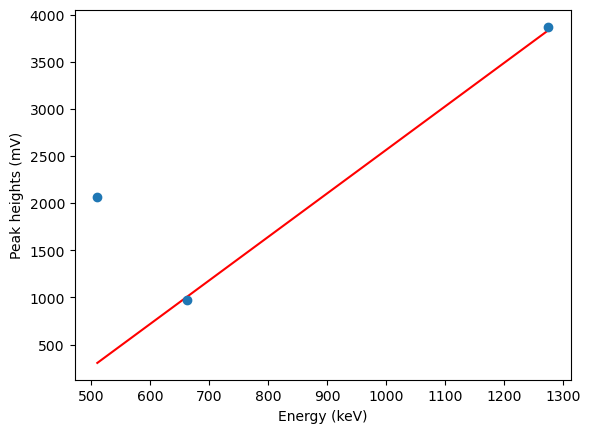

In [450]:
# create new figure
plt.figure()

# create errorbar plot with fit
plt.errorbar(peak_values, centers, yerr=y_err, fmt='o')
plt.xlabel("Energy (keV)")
plt.ylabel("Peak heights (mV)")

print(fit_result.fit_report())

x_fit = np.linspace(min(peak_values), max(peak_values), 200)
plt.plot(x_fit, fit_result.eval(x=x_fit), 'r-', label='Linear fit')
plt.savefig("Calibration_graph.png")


## Fit results Linear fit

In [451]:
slope = fit_result.params['slope'].value
intercept = fit_result.params['intercept'].value
slope_err = fit_result.params['slope'].stderr
intercept_err = fit_result.params['intercept'].stderr

print("y = ax + b for a linear fit")
print(f"a = Slope = {slope:.6f} ± {slope_err:.6f}")
print(f"b = Intercept = {intercept:.6f} ± {intercept_err:.6f}")


y = ax + b for a linear fit
a = Slope = 4.622526 ± 0.862340
b = Intercept = -2056.380791 ± 665.645637


# Data Analysis